In [46]:
import pandas as pd
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts


In [2]:
ride_to_open = "Resources/ride_data.csv"
city_to_open = "Resources/city_data.csv"

In [3]:
ride_data_df = pd.read_csv(ride_to_open)
city_data_df = pd.read_csv(city_to_open)

ride_data_df.dtypes
ride_data_df.isnull().sum()
ride_data_df.count()
city_data_df["type"].unique()
sum(city_data_df["type"] == "Suburban")
sum(city_data_df["type"] == "Rural")


18

In [173]:
pyber_data_df = ride_data_df.merge(city_data_df,how="left", on="city")
pyber_data_df.head(40)

total_drivers_type = pyber_data_df.groupby(["type"])["driver_count"].sum()
total_drivers_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [5]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [172]:
urban_ride_count = urban_cities_df.groupby(["city"])["ride_id"].count()
suburban_ride_count = suburban_cities_df.groupby(["city"])["ride_id"].count()
rural_ride_count = rural_cities_df.groupby(["city"])["ride_id"].count()

urban_avg_fare = urban_cities_df.groupby(["city"])["fare"].mean()
suburban_avg_fare = suburban_cities_df.groupby(["city"])["fare"].mean()
rural_avg_fare = rural_cities_df.groupby(["city"])["fare"].mean()

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_driver_count.sum()

490.0

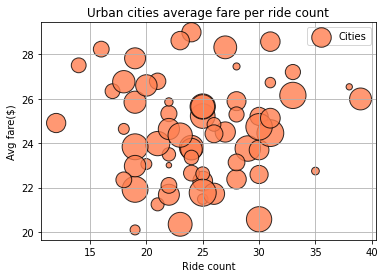

In [7]:
plt.scatter(urban_ride_count, urban_avg_fare, s = 10 * urban_driver_count, color = "coral", label = "Cities", edgecolor = "black", linewidths = 1, alpha = 0.8 )
plt.ylabel("Avg fare($)")
plt.xlabel("Ride count")
plt.tit 

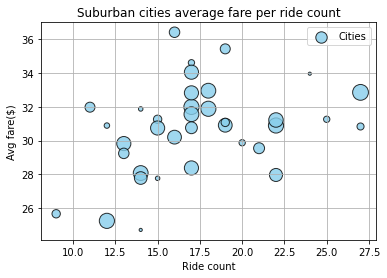

In [8]:
plt.scatter(suburban_ride_count, suburban_avg_fare, s = 10 * suburban_driver_count, color = "skyblue", label = "Cities", edgecolor = "black", linewidths = 1, alpha = 0.8 )
plt.ylabel("Avg fare($)")
plt.xlabel("Ride count")
plt.title("Suburban cities average fare per ride count")
plt.grid(True)
plt.legend()

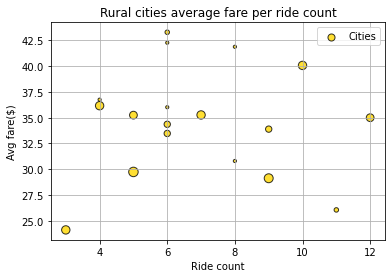

In [9]:
plt.scatter(rural_ride_count, rural_avg_fare, s = 10 * rural_driver_count, color = "gold", label = "Cities", edgecolor = "black", linewidths = 1, alpha = 0.8 )
plt.ylabel("Avg fare($)")
plt.xlabel("Ride count")
plt.title("Rural cities average fare per ride count")
plt.grid(True)
plt.legend()

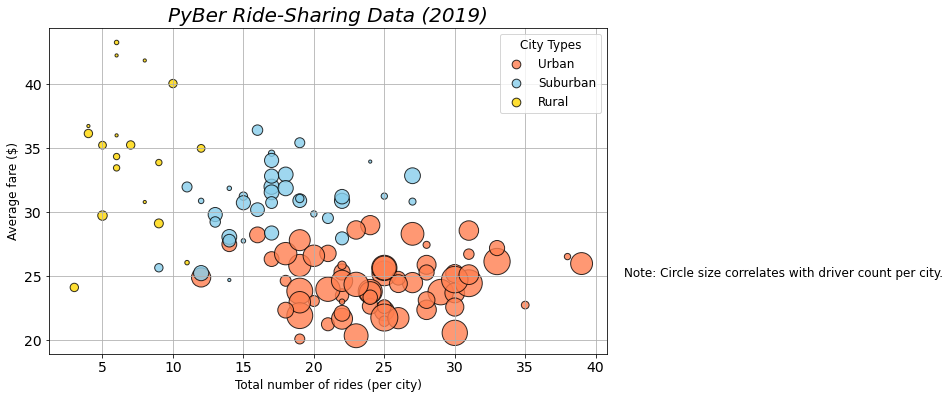

In [139]:
plt.subplots(figsize = (10,6))
plt.scatter(urban_ride_count, urban_avg_fare, s = 10 * urban_driver_count, color = "coral", label = "Urban", edgecolor = "black", linewidths = 1, alpha = 0.8 )
plt.scatter(suburban_ride_count, suburban_avg_fare, s = 10 * suburban_driver_count, color = "skyblue", label = "Suburban", edgecolor = "black", linewidths = 1, alpha = 0.8 )
plt.scatter(rural_ride_count, rural_avg_fare, s = 10 * rural_driver_count, color = "gold", label = "Rural", edgecolor = "black", linewidths = 1, alpha = 0.8 )


plt.ylabel("Average fare ($)", fontsize = 12)
plt.xlabel("Total number of rides (per city)", fontsize = 12)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20, style = "oblique")
plt.grid(True)
plt.legend()

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 25, "Note: Circle size correlates with driver count per city.", fontsize="12",wrap = True)
plt.savefig("analysis/Fig1.png")


In [140]:
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [141]:
suburban_drivers = suburban_cities_df["driver_count"]
urban_drivers = urban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver ir urban areas is  {mean_urban_drivers}.")
median_urban_drivers = np.median(urban_drivers)
print(f"The mean driver ir urban areas is {median_urban_drivers}.")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mean driver ir urban areas is  {mode_urban_drivers}.")

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver ir suburban areas is  {mean_suburban_drivers:.2f}.")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
median_rural_drivers = np.median(rural_drivers)
print(f"The median fare price for rural trips is ${median_rural_drivers:.2f}.")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")



The mean driver ir urban areas is  36.67815384615385.
The mean driver ir urban areas is 37.0.
The mean driver ir urban areas is  ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mean driver ir suburban areas is  13.71.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $4.00.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


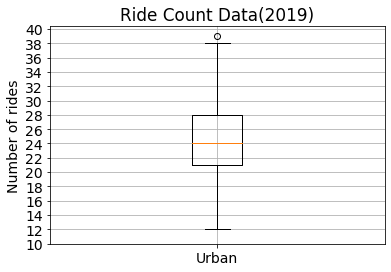

In [142]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)
ax.set_title("Ride Count Data(2019)")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()


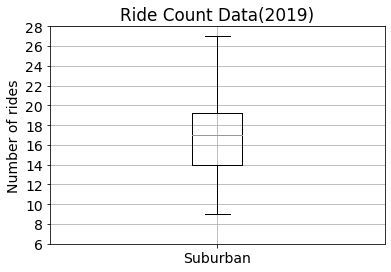

In [143]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)
ax.set_title("Ride Count Data(2019)")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(6, 30, step=2.0))
ax.grid()


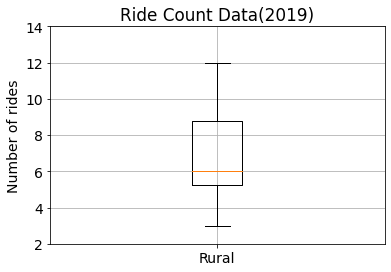

In [144]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)
ax.set_title("Ride Count Data(2019)")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(2, 16, step=2.0))
ax.grid()

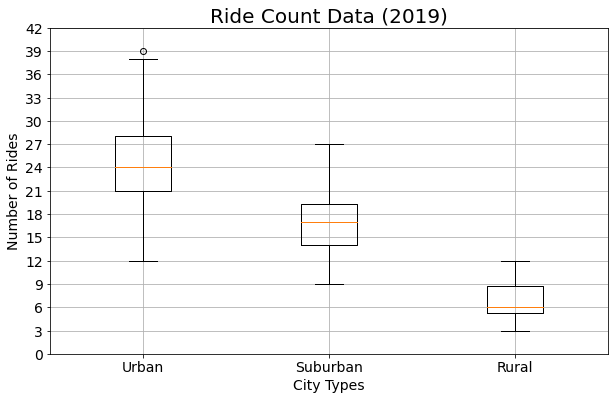

In [145]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [146]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


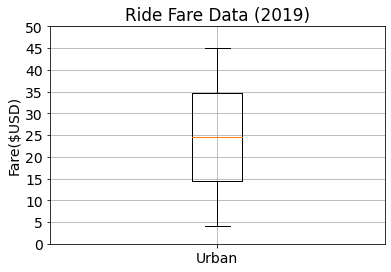

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [147]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

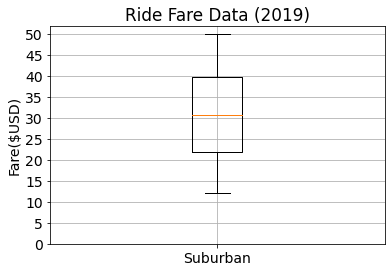

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [148]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

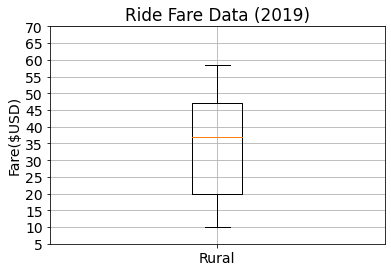

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [149]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 71, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

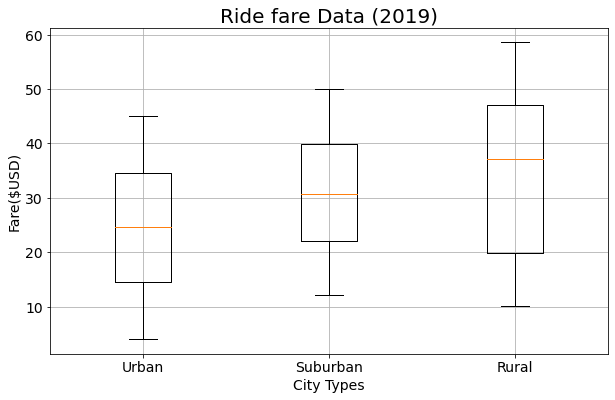

In [150]:
x_label= ["Urban", "Suburban", "Rural"]
fare_count = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(fare_count, labels = x_label)
ax.set_title('Ride fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()


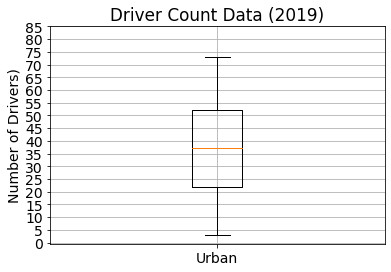

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [151]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

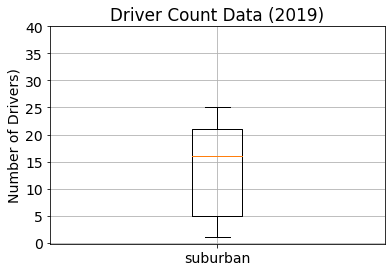

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [152]:
x_labels = ["suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 45, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

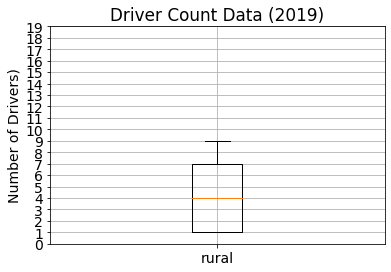

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [153]:
x_labels = ["rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 20, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

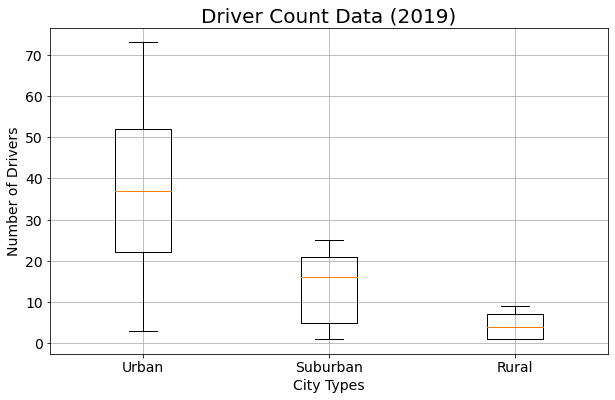

In [154]:
x_label= ["Urban", "Suburban", "Rural"]
fare_count = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(fare_count, labels = x_label)
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()


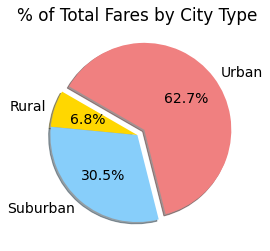

In [155]:
import matplotlib as mpl
sum_fare_type = pyber_data_df.groupby(["type"])["fare"].sum()
total_fare = pyber_data_df["fare"].sum()
percentage = sum_fare_type / total_fare * 100

plt.pie(percentage,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig5.png")

In [ ]:
sum_fare_type = pyber_data_df.groupby(["type"])["ride"].sum()
total_fare = pyber_data_df["fare"].sum()
percentage = sum_fare_type / total_fare * 100

plt.pie(percentage,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig5.png")

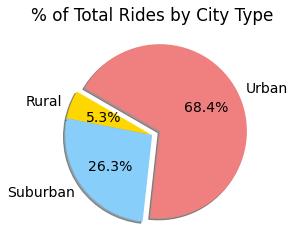

In [166]:
sum_ride_type = pyber_data_df.groupby(["type"])["ride_id"].count()
total_ride = pyber_data_df["ride_id"].count()
ride_percentage = sum_ride_type / total_ride * 100

plt.pie(ride_percentage,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig6.png")

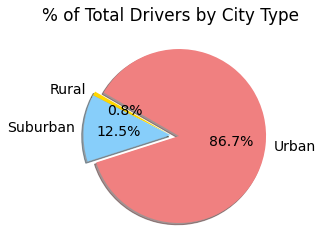

In [167]:
sum_drivers_type = pyber_data_df.groupby(["type"])["driver_count"].sum()
total_drivers = pyber_data_df["driver_count"].sum()
drivers_percentage = sum_drivers_type / total_drivers * 100

plt.pie(drivers_percentage,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig7.png")